## <p style="background-color:#34495E; color:lightgray; font-size:100%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">Main Classification Evaluation/Error Metrics | Confusion Matrix (Binary & Multiclass)</p>

Classification is the problem of identifying which of a set of categories an observation (or observations) belongs to. Binary classification is the task of classifying the elements of a set into two groups (each called class) on the basis of a classification rule. In machine learning, multiclass or multinomial classification is the problem of classifying instances into one of three or more classes. *(wikipedia)*

Classification metrics play a critical role in achieving the optimal classifier during the classification training.
Thus, a selection of suitable evaluation metric is an important key for discriminating and obtaining the
optimal classifier.

The classification metrics are generated from the confusion matrix. A confusion matrix helps measure the performance of a classification problem with the help of different metrics that can be calculated from it.

Understanding the confusion matrix and choosing the right metric is critical for evaluating the ML model.

This notebook presents an overview on the concepts of classification metrics, examples of calculating *(including macro, weighted, and micro averages)* visualizing main classification metrics, and cross-validating and GridSearchCV for multiclass classification using scikit-learn library.

### CONTENT
<a id='content'></a>


- 1) [Data Review](#phase1)


- 2) [Model Building](#phase2)

   
- 3) [Confusion Matrix](#phase3)
    * 3.1 [General Overview and Main Concepts](#part3.1)
    * 3.2 [sklearn.metrics.confusion_matrix](#part3.2)
    * 3.3 [Confusion Matrix Visualization](#part3.3)
    
    
- 4) [Classification Metrics](#phase4)
    * 4.1 [Classification Report](#part4.1)
    * 4.2 [Accuracy (accuracy_score)](#part4.2)
    * 4.3 [Precision (precision_score)](#part4.3)
    * 4.4 [Recall (recall_score) - Specificity](#part4.4)
    * 4.5 [F Measure (f1_score & fbeta_score)](#part4.5)
    * 4.6 [Balanced Accuracy Score](#part4.6)
    
    
- 5) [Multiclass Classification](#phase5)
    * 5.1 [Data Review](#part5.1)
    * 5.2 [Preprocessing and Modeling](#part5.2)
    * 5.3 [Multilabel Confusion Matrix](#part5.3)
    * 5.4 [Confusion Matrix Visualization](#part5.4)
    * 5.5 [Main Classification Metrics](#part5.5)
         * 5.5.1 [sklearn.metrics.classification_report](#part5.5.1)
         * 5.5.2 [micro average scores](#part5.5.2)
         * 5.5.3 [accuracy, precision, recall, and f1 scores](#part5.5.3)
         * 5.5.4 [sklearn.metrics.precision_recall_fscore_support](#part5.5.4)
    * 5.6 [Cross Validation For Multiclass Classification](#part5.6)
         * 5.6.1 [cross-validation for all classes](#part5.6.1)
         * 5.6.2 [cross-validation for a subset of classes](#part5.6.2)
         * 5.6.3 [cross-validation for a specific class](#part5.6.3)
    * 5.7 [GridSearchCV For Multiclass Classification](#part5.7)
         * 5.7.1 [GridSearchCV for accuracy score](#part5.7.1)
         * 5.7.2 [GridSearchCV for balanced accuracy score (macro avg-recall)](#part5.7.2)
         * 5.7.3 [GridSearchCV for a specific class](#part5.7.3)
    


## <p style="background-color:seagreen; color:lightgray; font-size:100%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">1. Data Review<a id='phase1'></p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.style import set_palette
set_palette('flatui')

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', '{:.3f}'.format)

We will skip the EDA as we will focus on the classification metrics

In [2]:
df=pd.read_csv("diabetes.csv")
print('Dataset Shape  : ', df.shape)
print('Missing Values : ', df.isnull().sum().sum())
df.head()

Dataset Shape  :  (768, 9)
Missing Values :  0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


There are incorrect values for some of the observations in the dataset. So we will drop those rows.

In [4]:
df=df[df.SkinThickness < 70]
df=df[df.Glucose > 0]
df=df[df.BloodPressure > 35]
df=df[df.BMI > 0]

df.reset_index(drop=True, inplace=True)

In [5]:
df.shape

(720, 9)

***target label***

1 indicates diabetic and 0 non-diabetic.

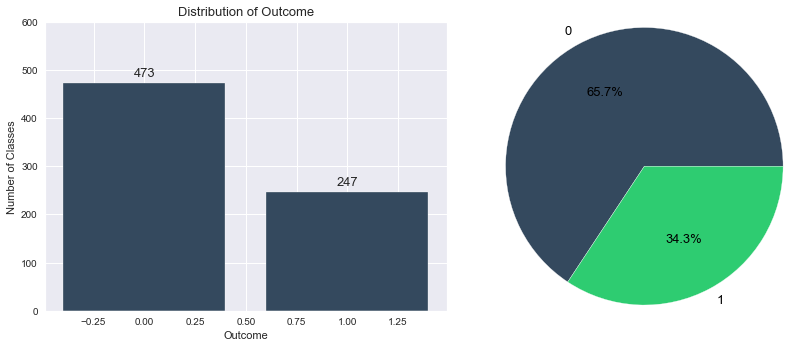

In [6]:
plt.figure(figsize=(12,5))

x = df['Outcome'].value_counts().index
y = df['Outcome'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y, label='Outcome')
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 600)

plt.xlabel('Outcome'), plt.ylabel('Number of Classes') 
plt.title('Distribution of Outcome', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13})

plt.tight_layout();

## <p style="background-color:seagreen; color:lightgray; font-size:100%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">2. Model Building<a id='phase2'></p>

[CONTENT](#content)

## Preprocessing

In [7]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (576, 8)
Test features shape  :  (144, 8)


In [10]:
y_train.value_counts(), y_test.value_counts()

(0    378
 1    198
 Name: Outcome, dtype: int64,
 0    95
 1    49
 Name: Outcome, dtype: int64)

## Modeling

In [11]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score, fbeta_score

In [12]:
clf_model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(random_state=101))
])

clf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=101))])

In [13]:
y_pred = clf_model.predict(X_test)

## <p style="background-color:seagreen; color:lightgray; font-size:100%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">3. Confusion Matrix<a id='phase3'></p>

[CONTENT](#content)

## 3.1 General Overview and Main Concepts 
<a id='part3.1'>

The classification metrics *(accuracy, precision, etc.)* are generated from the confusion matrix.

It is a table with combinations of predicted and actual values.

By definition a confusion matrix ***C*** is such that ***C(i, j)*** is equal to the number of observations known to be in group ***i*** and predicted to be in group ***j***.

***NOTE : some references may use different conventions for axes***

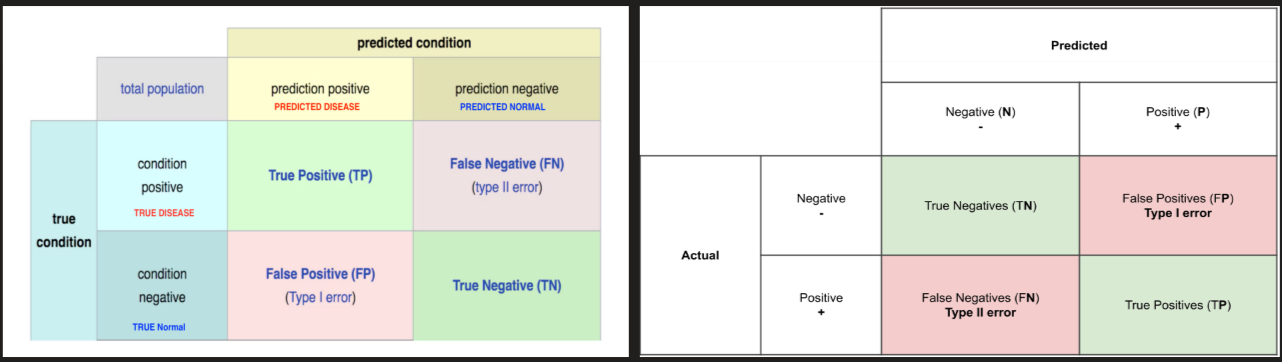

**some common terms**

- ***True Positive (TP) :*** If the actual classification is positive and the predicted classification is positive **(1,1) or (PP)**, this is called a true positive result because the positive sample was correctly identified by the classifier.


- ***True Negative (TN) :*** If the actual classification is negative and the predicted classification is negative **(0,0) or (NN)**, this is called a true negative result because the negative sample gets correctly identified by the classifier.


- ***False Positive (FP) | Type I Error :*** If the actual classification is negative and the predicted classification is positive **(0,1) or (NP)**, this is called a false positive result because the negative sample is incorrectly identified by the classifier as being positive.


- ***False Negative (FN) | Type II Error:*** If the actual classification is positive and the predicted classification is negative **(1,0) or (PN)**, this is called a false negative result because the positive sample is incorrectly identified by the classifier as being negative.

------------------------------------------------------

- ***Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR) :*** TPR = TP / Actual Positives = TP / (TP + FN) = 1 - FNR


- ***Specificity, Selectivity or True Negative Rate (TNR) :*** TNR = TN / Actual Negatives = TN / (TN + FP) = 1 - FPR


- ***Miss Rate or False Negative Rate (FNR) :*** FNR = FN / Actual Positives = FN / (FN + TP) = 1 - TPR


- ***Fall-out or False Positive Rate (FPR) :*** FPR = FP / Actual Negatives = FP / (FP + TN) = 1 - TNR


SOURCE : [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

***

## 3.2 sklearn.metrics.confusion_matrix 
<a id='part3.2'>

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class *(Wikipedia and other references may use different convention for axes).*

By definition, entry ***i, j*** in a confusion matrix is the number of observations actually in group ***i***, but predicted to be in group ***j***.

Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), true positives is C(1,1) and false positives is C(0,1).

SOURCE : [sklearn.metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [14]:
# Confusion Matrix of our model
confusion_matrix(y_test, y_pred)

array([[85, 10],
       [20, 29]], dtype=int64)

**"labels"** parameter may be used to reorder or select a subset of labels.

*(labels that appear at least once in y_true or y_pred are used in sorted order by default)*

In [15]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[29, 20],
       [10, 85]], dtype=int64)

In the binary case, we can extract true negatives, false positives, false negatives and true positives.

In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [17]:
(tn, fp, fn, tp)

(85, 10, 20, 29)

***

## 3.3 Confusion Matrix Visualization
<a id='part3.3'>

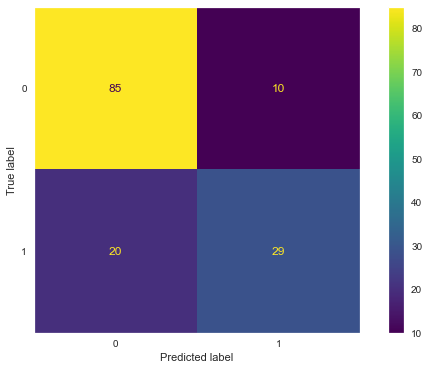

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# ConfusionMatrixDisplay.from_estimator(clf_model, X_test, y_test)
# plot_confusion_matrix(clf_model, X_test, y_test)
plt.grid(None);

**"labels"** parameter may be used to reorder or select a subset of labels.

**"display_labels"** parameter can be used to rename classes.

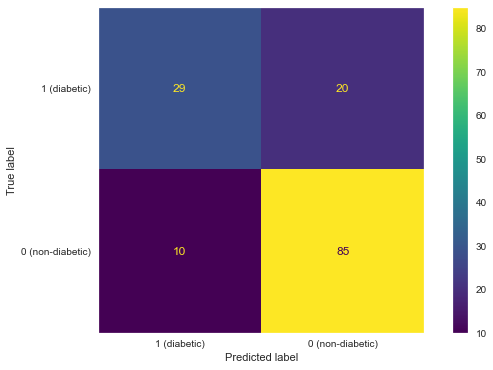

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[1,0], 
                                        display_labels=['1 (diabetic)','0 (non-diabetic)'])
plt.grid(None);

***Confusion Matrix Visualization With Seaborn Heatmap***

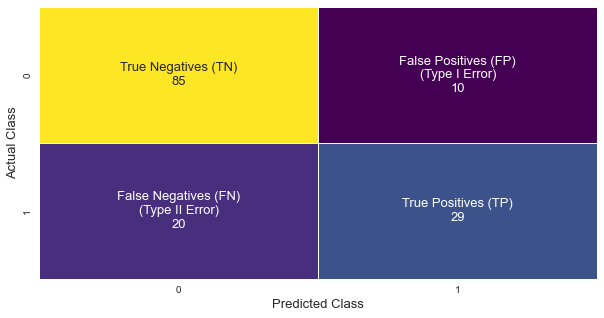

In [20]:
plt.figure(figsize=(10,5))

y_pred = clf_model.predict(X_test)
clf_matrix = confusion_matrix(y_test, y_pred)

condition_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
                   'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
condition_values = [value for value in clf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(condition_names, condition_values)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(clf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1, cbar=False)
ax.set_xlabel('Predicted Class', fontsize=13)
ax.set_ylabel('Actual Class', fontsize=13);

## <p style="background-color:seagreen; color:lightgray; font-size:100%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">4. Performance/Evaluation/Error Metrics For Classification<a id='phase4'></p>

[CONTENT](#content)

This part will focus on the definition of some metrics and how to calculate their scores using the scikit-learn library.

## 4.1 Classification Report
<a id='part4.1'>

### sklearn.metrics.classification_report

The classification_report function builds a text report showing the main classification metrics.

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144



Dictionary returned if **"output_dict"** parameter is **True.**

In [22]:
import json
print(json.dumps(classification_report(y_test, y_pred, output_dict=True), indent=3))

{
   "0": {
      "precision": 0.8095238095238095,
      "recall": 0.8947368421052632,
      "f1-score": 0.8500000000000001,
      "support": 95
   },
   "1": {
      "precision": 0.7435897435897436,
      "recall": 0.5918367346938775,
      "f1-score": 0.6590909090909091,
      "support": 49
   },
   "accuracy": 0.7916666666666666,
   "macro avg": {
      "precision": 0.7765567765567766,
      "recall": 0.7432867883995704,
      "f1-score": 0.7545454545454546,
      "support": 144
   },
   "weighted avg": {
      "precision": 0.7870879120879122,
      "recall": 0.7916666666666666,
      "f1-score": 0.7850378787878789,
      "support": 144
   }
}


**"labels"** parameter can be used to reorder the labels.

**"target_names"** parameter can be used to rename classes.

**"digits"** parameter will be ignored when "output_dict" is True.

In [23]:
print(classification_report(y_test, y_pred, labels=[1,0], target_names=['1 (diabetic)','0 (non-diabetic)'], digits=3))

                  precision    recall  f1-score   support

    1 (diabetic)      0.744     0.592     0.659        49
0 (non-diabetic)      0.810     0.895     0.850        95

        accuracy                          0.792       144
       macro avg      0.777     0.743     0.755       144
    weighted avg      0.787     0.792     0.785       144



- **macro avg** (averaging the unweighted mean per label/class)


    - macro avg (precision) = (precision-0 + precision-1) / 2
    

- **weighted avg** (averaging the support-weighted mean per label/class)


    - weighted avg (precision) = ( (precision-0 * support-0) + (precision-1 * support * 1) ) / all predicted values (144)

### yellowbrick ClassificationReport

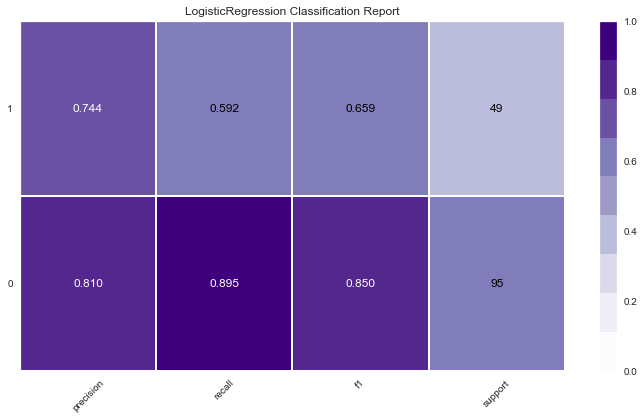

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [24]:
from yellowbrick.classifier import ClassificationReport

clf_model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(random_state=101))
])

viz = ClassificationReport(clf_model, support=True, cmap='Purples')

viz.fit(X_train, y_train)        # Fit the visualizer and the model
viz.score(X_test, y_test)        # Evaluate the model on the test data
viz.show()                       # Finalize and show the figure

***

## 4.2 ACCURACY (accuracy_score)
<a id='part4.2'>

- The proportion of correct predictions ***(both true positives and true negatives)*** among the total number of cases examined. 

*(simply measures how often the classifier correctly predicts)*

- Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes. Because it gives equal importance to both false positives and false negatives.


- Accuracy = (TP + TN) / (All Predicted Values)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144



In [26]:
# Accuracy Formula
(tp + tn) / y_test.shape[0] # all predicted values

0.7916666666666666

accuracy score can be calculated using confusion_matrix as:

In [27]:
# sum of diagonal values / sum of all the elements of the confusion matrix
confusion_matrix(y_test, y_pred).trace() / confusion_matrix(y_test, y_pred).sum()

0.7916666666666666

In [28]:
print('Accuracy Score')
print('-'*30)
print('the fraction of correctly classified samples  : ', np.round(clf_model.score(X_test, y_test), 2))
#print('the fraction of correctly classified samples : ', np.round(accuracy_score(y_test,y_pred), 2))

print('the number of correctly classified samples    : ', np.round(accuracy_score(y_test,y_pred, normalize=False), 2))

Accuracy Score
------------------------------
the fraction of correctly classified samples  :  0.79
the number of correctly classified samples    :  114


***

## 4.3 PRECISION (precision_score)
<a id='part4.3'>

- Accuracy of positive predictions. Also called **positive predictive value (PPV).**
- The precision is the ratio ***tp / (tp + fp)*** where tp is the number of ***true positives*** and fp the number of ***false positives***. 
- The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- ***Precision doesnot include the number of True Negatives in its calculation, and is not effected by the imbalance!***
- Increasing precision reduces recall and vice versa. This is called precision/recall tradeoff.

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144



In [30]:
# Precision Formula
tp / (tp + fp)

0.7435897435897436

In [31]:
print('Precision Score')
print('-'*30)
print(f"1 label's score : {precision_score(y_test, y_pred):.2f}")
print(f"0 label's score : {precision_score(y_test, y_pred, pos_label=0):.2f}")
print()
print(f"macro avg\t: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"weighted avg\t: {precision_score(y_test, y_pred, average='weighted'):.2f}")

# calculation of weighted avg precision :
# ((precision_score(y_test, y_pred, pos_label=0) * 95) + (precision_score(y_test, y_pred) * 49)) / 144

Precision Score
------------------------------
1 label's score : 0.74
0 label's score : 0.81

macro avg	: 0.78
weighted avg	: 0.79


***

[CONTENT](#content)

## 4.4 RECALL (recall_score) - SPECIFICITY
<a id='part4.4'>

- Recall is also known as **sensitivity, hit rate or true positive rate (TPR).**

*(in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.)*
- The recall is the ratio ***tp / (tp + fn)*** where tp is the number of ***true positives*** and fn the number of ***false negatives.*** 
- The recall is intuitively the ability of the classifier to find all the positive samples. *(Fraction of positives that were correctly identified)*
- ***It is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!***

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144



In [33]:
# Recall Formula : TP / (TP + FN) = 1 - FNR
tp / (tp + fn)

0.5918367346938775

In [34]:
print('Recall Score')
print('-'*30)
print(f"1 label's score : {recall_score(y_test, y_pred):.2f}")
print(f"0 label's score : {recall_score(y_test, y_pred, pos_label=0):.2f} (also known as SPECIFICITY, assuming 1 tag is true positive)")
print()
print(f"macro avg\t: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"weighted avg\t: {recall_score(y_test, y_pred, average='weighted'):.2f}")

# calculation of weighted avg recall :
# ((recall_score(y_test, y_pred, pos_label=0) * 95) + (recall_score(y_test, y_pred) * 49)) / 144

Recall Score
------------------------------
1 label's score : 0.59
0 label's score : 0.89 (also known as SPECIFICITY, assuming 1 tag is true positive)

macro avg	: 0.74
weighted avg	: 0.79


***- Sensitivity (true positive rate)*** refers to the probability of a positive test, conditioned on truly being positive.

***- Specificity (true negative rate)*** refers to the probability of a negative test, conditioned on truly being negative.

In [35]:
# Specificity Formula : TN / (TN + FP) = 1 - FPR
tn / (tn + fp)

0.8947368421052632

In [36]:
tn / (tn + fp) == recall_score(y_test, y_pred, pos_label=0)

True

***

## 4.5 F Measure
<a id='part4.5'>

### f1_score

- Also known as balanced F-score or F-measure. *(mostly used for **unbalanced** distribution)*

- The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. *(We use the harmonic mean instead of a simple average because it punishes extreme values.)*

- The relative contribution of precision and recall to the F1 score are **equal**. So, the F1 score is a better measure to use if you seek a balance between Precision and Recall.

- It is maximum when Precision is equal to Recall.



- $\text{F1}=2 \times \dfrac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144



In [38]:
# Calculation of f1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)
F1

0.6590909090909091

In [39]:
print('F1 Score')
print('-'*30)
print(f"1 label's score : {f1_score(y_test, y_pred):.2f}")
print(f"0 label's score : {f1_score(y_test, y_pred, pos_label=0):.2f}")
print()
print(f"macro avg\t: {f1_score(y_test, y_pred, average='macro'):.2f}")
print(f"weighted avg\t: {f1_score(y_test, y_pred, average='weighted'):.2f}")

# calculation of weighted avg f1 :
# ((f1_score(y_test, y_pred, pos_label=0) * 95) + (f1_score(y_test, y_pred) * 49)) / 144

F1 Score
------------------------------
1 label's score : 0.66
0 label's score : 0.85

macro avg	: 0.75
weighted avg	: 0.79


### fbeta_score

- The F-beta score is the **weighted** harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.

- It allows you to decide how to weight the balance between precision and recall using the **beta** parameter.

- It is useful when false negatives are slightly more important than false positives, or the reverse.

- The beta parameter determines the weight of recall in the combined score. "beta < 1" lends more weight to precision, while "beta >" 1 favors recall.

- When beta=1, the fbeta score is equivalent to the f1 score.


- FORMULA : 

    - $\text{fbeta_score} = (1 + ß²) \times \dfrac{\text{Precision} \times \text{Recall}}{(ß² \times \text{Precision}) + \text{Recall}}$
    
[fbeta_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html)

In [40]:
print(f"F1-Measure   (1 label)  : {fbeta_score(y_test, y_pred, beta=1):.3f}")  # f1_score(y_test, y_pred)
print(f"F0.5-Measure (1 label)  : {fbeta_score(y_test, y_pred, beta=0.5):.3f}")
print(f"F2-Measure   (1 label)  : {fbeta_score(y_test, y_pred, beta=2):.3f}")

F1-Measure   (1 label)  : 0.659
F0.5-Measure (1 label)  : 0.707
F2-Measure   (1 label)  : 0.617


In [41]:
# F2-Measure calculation

precision = tp / (tp + fp)
recall = tp / (tp + fn)
beta = 2

FBeta = (1 + (beta**2)) * ((precision * recall) / ((beta**2) * precision + recall)) 
FBeta

0.6170212765957447

***

## 4.6 BALANCED ACCURACY SCORE (macro avg - recall)
<a id='part4.6'>

- The balanced accuracy in binary and multiclass classification problems to deal with **imbalanced** datasets. 

- It is defined as the average of recall obtained on each class.

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144



***balanced accuracy = macro avg (recall)***

In [43]:
balanced_accuracy_score(y_test, y_pred)

0.7432867883995704

In [44]:
balanced_accuracy_score(y_test, y_pred) == recall_score(y_test, y_pred, average='macro')

True

***

## <p style="background-color:seagreen; color:lightgray; font-size:100%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">5. Multiclass Classification<a id='phase5'></p>

[CONTENT](#content)

## 5.1 Data Review
<a id='part5.1'>

In [45]:
df = pd.read_csv("wine_data.csv")
print('Dataset Shape  : ', df.shape)
print('Missing Values : ', df.isnull().sum().sum())
df.head()

Dataset Shape  :  (4882, 12)
Missing Values :  0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,4.700,0.785,0.000,3.400,0.036,23.000,134.000,0.990,3.530,0.920,13.800,6
1,9.200,0.710,0.230,6.200,0.042,15.000,93.000,0.995,2.890,0.340,10.100,6
2,6.400,0.690,0.090,7.600,0.044,34.000,144.000,0.995,3.260,0.380,10.100,6
3,6.900,0.270,0.490,23.500,0.057,59.000,235.000,1.002,2.980,0.470,8.600,5
4,5.900,0.220,0.450,22.600,0.120,55.000,122.000,0.996,3.100,0.350,12.800,5


In [46]:
df.quality.value_counts()

6    2194
5    1448
7     879
8     175
4     162
3      19
9       5
Name: quality, dtype: int64

In [47]:
df['quality'] = ['low' if x < 5 else 'medium' if x < 8 else 'high' for x in df.quality]

In [48]:
df.sample(5, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4557,7.600,0.230,0.260,15.300,0.067,32.000,166.000,0.999,3.030,0.440,9.200,low
393,7.200,0.390,0.630,11.000,0.044,55.000,156.000,0.997,3.090,0.440,8.700,medium
4850,5.800,0.290,0.050,0.800,0.038,11.000,30.000,0.992,3.360,0.350,9.200,medium
4230,5.600,0.200,0.220,1.300,0.049,25.000,155.000,0.993,3.740,0.430,10.000,medium
3640,5.900,0.190,0.210,1.700,0.045,57.000,135.000,0.993,3.320,0.440,9.500,medium


In [49]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4882.000,4882.000,4882.000,4882.000,4882.000,4882.000,4882.000,4882.000,4882.000,4882.000,4882.000
mean,6.855,0.278,0.334,6.390,0.046,35.279,138.323,0.994,3.188,0.490,10.511
std,0.836,0.099,0.119,5.003,0.021,16.597,42.246,0.003,0.150,0.114,1.229
min,3.800,0.080,0.000,0.600,0.012,2.000,10.000,0.987,2.720,0.220,8.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.083,0.410,9.500
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400
max,11.800,1.005,1.230,31.600,0.290,146.500,366.500,1.010,3.820,1.010,14.200


***target label***

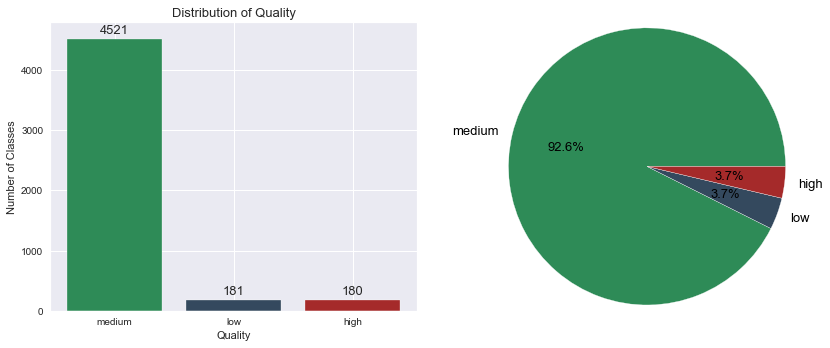

In [50]:
plt.figure(figsize=(12,5))

x = df['quality'].value_counts().index
y = df['quality'].value_counts().values

plt.subplot(121)
g = plt.bar(x, y, label='quality', color=['seagreen','#34495E', 'brown'])
plt.bar_label(g, padding=2, size=13), plt.ylim(0, 4800)

plt.xlabel('Quality'), plt.ylabel('Number of Classes') 
plt.title('Distribution of Quality', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E', 'brown'])

plt.tight_layout();

***

## 5.2 Preprocessing and Modeling
<a id='part5.2'>

In [51]:
X = df.drop(["quality"], axis=1)
y = df["quality"]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [53]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (3905, 11)
Test features shape  :  (977, 11)


In [54]:
y_train.value_counts(), y_test.value_counts()

(medium    3616
 low        145
 high       144
 Name: quality, dtype: int64,
 medium    905
 low        36
 high       36
 Name: quality, dtype: int64)

***Model Building***

For the meaningful interpretation of the confusion matrix, we set higher class weights for the minority classes *(we will not take any threshold decision for now)*. Otherwise, we get 0-True Negative predictions as the data is highly imbalanced.

In [55]:
clf_model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(class_weight={'high':20, 'low':15, 'medium':1}, random_state=101))
])

clf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight={'high': 20, 'low': 15,
                                                  'medium': 1},
                                    random_state=101))])

In [56]:
y_pred = clf_model.predict(X_test)

***

## 5.3 Multilabel Confusion Matrix
<a id='part5.3'>

[CONTENT](#content)

- Cells outside the row and column for the positive class contain the True Negatives. 

- An incorrect prediction inside the negative class is considered as a true negative.

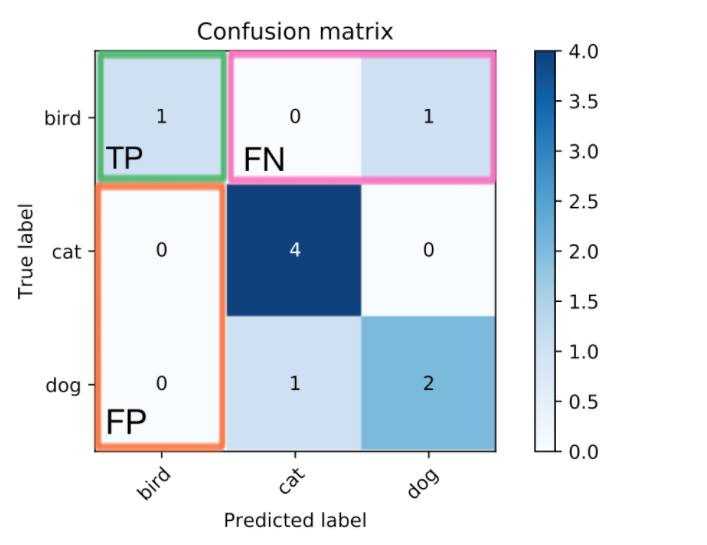

*(based on bird class)*

### sklearn.metrics.confusion_matrix

In [57]:
# Confusion Matrix of our model
confusion_matrix(y_test, y_pred)

array([[ 23,   3,  10],
       [  2,  18,  16],
       [203, 112, 590]], dtype=int64)

**"labels"** parameter may be used to reorder or select a subset of labels/classes.

*(labels/classes that appear at least once in y_true or y_pred are used in sorted order by default)*

In [58]:
# reordering of classes
confusion_matrix(y_test, y_pred, labels=['medium','high','low'])

array([[590, 203, 112],
       [ 10,  23,   3],
       [ 16,   2,  18]], dtype=int64)

### sklearn.metrics.multilabel_confusion_matrix

- Compute a confusion matrix for each class or sample.


- Multiclass data will be treated as if binarized under a one-vs-rest transformation. Returned confusion matrices will be in the order of sorted unique labels in the union of (y_true, y_pred).


- In multilabel confusion matrix ***(MCM)*** , the count of true negatives is ***MCM(0,0)***, false negatives is ***MCM(1,0)***, true positives is ***MCM(1,1)*** and false positives is ***MCM(0,1)***.


Notes

The multilabel_confusion_matrix calculates class-wise or sample-wise multilabel confusion matrices, and in multiclass tasks, labels are binarized under a one-vs-rest way; while confusion_matrix calculates one confusion matrix for confusion between every two classes.


SOURCE : [sklearn.metrics.multilabel_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix)

In [59]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

# default order ===> high, low, medium

array([[[736, 205],
        [ 13,  23]],

       [[826, 115],
        [ 18,  18]],

       [[ 46,  26],
        [315, 590]]], dtype=int64)

***

## 5.4 Confusion Matrix Visualization
<a id='part5.4'>

[CONTENT](#content)

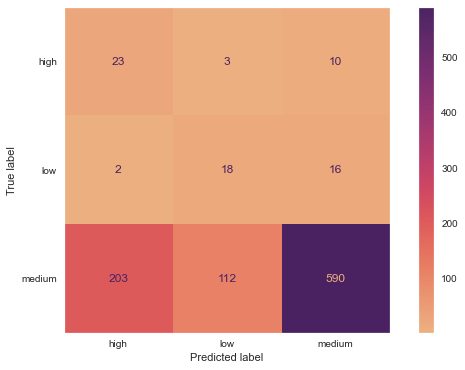

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='flare')
# ConfusionMatrixDisplay.from_estimator(clf_model, X_test, y_test)
# plot_confusion_matrix(clf_model, X_test, y_test)
plt.grid(None);

**"labels"** parameter can be used to reorder or select a subset of classes.

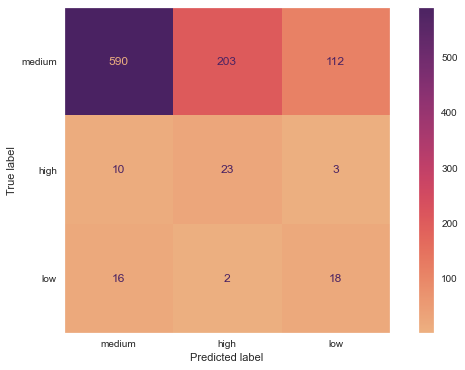

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=['medium','high','low'], cmap='flare')
plt.grid(None);

***seaborn heatmap***

<code style="background:purple;color:white">assuming we are interested in high quality wines</code>

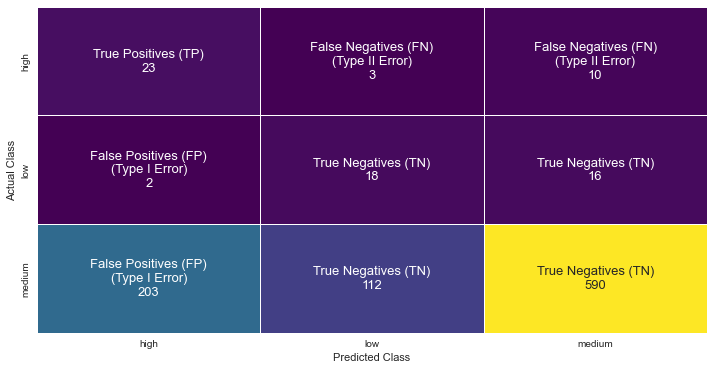

In [62]:
plt.figure(figsize=(12,6))

y_pred = clf_model.predict(X_test)
clf_matrix = confusion_matrix(y_test, y_pred)

condition_names = ['True Positives (TP)', 'False Negatives (FN)\n(Type II Error)', 'False Negatives (FN)\n(Type II Error)', 
                   'False Positives (FP)\n(Type I Error)', 'True Negatives (TN)', 'True Negatives (TN)',
                   'False Positives (FP)\n(Type I Error)', 'True Negatives (TN)', 'True Negatives (TN)']

condition_values = [value for value in clf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(condition_names, condition_values)]
labels = np.asarray(labels).reshape(3, 3)

ax = sns.heatmap(clf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1, cbar=False)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class', 
       xticklabels=['high','low','medium'], yticklabels=['high','low','medium']);

***

## 5.5 Main Classification Metrics
<a id='part5.5'>

[CONTENT](#content)

### 5.5.1 sklearn.metrics.classification_report
<a id='part5.5.1'>

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.10      0.64      0.17        36
         low       0.14      0.50      0.21        36
      medium       0.96      0.65      0.78       905

    accuracy                           0.65       977
   macro avg       0.40      0.60      0.39       977
weighted avg       0.90      0.65      0.73       977



- **macro avg** (averaging the unweighted mean per label/class)

    
    - macro avg (precision) = (precision-high + precision-low + precision-medium) / 3
    

- **weighted avg** (averaging the support-weighted mean per label/class)


    - weighted avg (precision) = ( (precision-high * support-high) + (precision-low * support-low) + (precision-medium * support-medium)) / all predicted values (977)
    
 
- **micro avg** (averaging the total true positives, false negatives and false positives)

  *(micro avg is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.)*

### 5.5.2 micro average scores
<a id='part5.5.2'>

In [64]:
# micro averages of "medium" and "low" classes
print(classification_report(y_test, y_pred, labels=['medium','low'], digits=2))

              precision    recall  f1-score   support

      medium       0.96      0.65      0.78       905
         low       0.14      0.50      0.21        36

   micro avg       0.81      0.65      0.72       941
   macro avg       0.55      0.58      0.49       941
weighted avg       0.93      0.65      0.75       941



In [65]:
precision_score(y_test, y_pred, average='micro', labels=['medium','low'])

0.8117489986648865

*TP (medium), TP (low) = (590), (18)*

*FP (medium) = 10 + 16*

*FP (low) = 112 + 3*


*micro avg (precision) = (590 + 18) / (590 + 18) + (26 + 115)*

In [66]:
# micro averages of "high" and "medium" classes
print(classification_report(y_test, y_pred, labels=['high','medium'], digits=2))

              precision    recall  f1-score   support

        high       0.10      0.64      0.17        36
      medium       0.96      0.65      0.78       905

   micro avg       0.73      0.65      0.69       941
   macro avg       0.53      0.65      0.48       941
weighted avg       0.93      0.65      0.75       941



In [67]:
precision_score(y_test, y_pred, average='micro', labels=['high','medium'])

0.726303317535545

*TP (high), TP (medium) = (23), (590)*

*FN (high) = 10 + 3*

*FN (medium) = 203 + 112*


*micro avg (recall) = (590 + 23) / (590 + 23) + (13 + 315)*

### 5.5.3 accuracy, precision, recall, and f1 scores
<a id='part5.5.3'>

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.10      0.64      0.17        36
         low       0.14      0.50      0.21        36
      medium       0.96      0.65      0.78       905

    accuracy                           0.65       977
   macro avg       0.40      0.60      0.39       977
weighted avg       0.90      0.65      0.73       977



accuracy score

In [69]:
print('Accuracy Score')
print('-'*30)
print('the fraction of correctly classified samples  : ', np.round(clf_model.score(X_test, y_test), 2))
#print('the fraction of correctly classified samples : ', np.round(accuracy_score(y_test,y_pred), 2))

print('the number of correctly classified samples    : ', np.round(accuracy_score(y_test,y_pred, normalize=False), 2))

Accuracy Score
------------------------------
the fraction of correctly classified samples  :  0.65
the number of correctly classified samples    :  631


In [70]:
# Accuracy Formula
(23 + 18 + 590) / y_test.shape[0] # all predicted values

0.6458546571136131

precision, recall and f1 scores

In [71]:
# all classes

print('precision scores :', precision_score(y_test, y_pred, average=None))
print('recall scores    :', recall_score(y_test, y_pred, average=None))
print('f1 scores        :', f1_score(y_test, y_pred, average=None))

precision scores : [0.10087719 0.13533835 0.95779221]
recall scores    : [0.63888889 0.5        0.6519337 ]
f1 scores        : [0.17424242 0.21301775 0.77580539]


In [72]:
# an example of a specific class
precision_score(y_test, y_pred, average=None, labels=['medium'])

array([0.95779221])

In [73]:
# an example of macro average score for two classes
recall_score(y_test, y_pred, average='macro', labels=['high', 'medium'])

0.6454112952731736

In [74]:
# an example of weighted average
f1_score(y_test, y_pred, average='weighted')

0.732901991149373

### 5.5.4 sklearn.metrics.precision_recall_fscore_support
<a id='part5.5.4'>   

Compute precision, recall, F-measure and support for each class.

In [75]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.10087719, 0.13533835, 0.95779221]),
 array([0.63888889, 0.5       , 0.6519337 ]),
 array([0.17424242, 0.21301775, 0.77580539]),
 array([ 36,  36, 905], dtype=int64))

In [76]:
# macro avg scores
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.3980025822131085, 0.5969408635154491, 0.3876885223039069, None)

In [77]:
precision_score(y_test, y_pred, average='weighted', labels=['high','medium'])

0.9250090616358304

***

## 5.6 Cross-Validation For Multiclass Classification
<a id='part5.6'> 

[CONTENT](#content)

*(using joint scoring metrics)*

In [78]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

We should prefer StratifiedKFold over KFold when dealing with classification tasks with imbalanced class distributions.

### 5.6.1 cross-validation for all classes
<a id='part5.6.1'> 

<code style="background:yellow;color:black">"cv" parameter : For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with "shuffle=False" so the splits will be the same across calls. default cv=None, to use the default 5-fold cross validation</code>

In [79]:
model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(class_weight={'high':20, 'low':15, 'medium':1}, random_state=101))
])

scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision_weighted','recall_weighted',
                                                          'f1_weighted'], cv=5, n_jobs=-1)
df_scores = pd.DataFrame(scores, index=range(1, 6))
print('Average Performance\n', df_scores.mean()[2:], sep='\n')

df_scores

Average Performance

test_accuracy             0.629
test_precision_weighted   0.896
test_recall_weighted      0.629
test_f1_weighted          0.719
dtype: float64


,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.113,0.019,0.653,0.888,0.653,0.737
2,0.145,0.025,0.607,0.894,0.607,0.703
3,0.128,0.033,0.630,0.900,0.630,0.720
4,0.121,0.032,0.589,0.888,0.589,0.688
5,0.126,0.032,0.665,0.910,0.665,0.748


we will get the same results using StratifiedKFold explicitly

In [80]:
from sklearn.model_selection import StratifiedKFold

model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(class_weight={'high':20, 'low':15, 'medium':1}, random_state=101))
])

skf = StratifiedKFold(n_splits=5, shuffle=False)

scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision_weighted','recall_weighted',
                                                          'f1_weighted'], cv=skf, n_jobs=-1)
df_scores = pd.DataFrame(scores, index=range(1, 6))
print('Average Performance\n', df_scores.mean()[2:], sep='\n')

df_scores

Average Performance

test_accuracy             0.629
test_precision_weighted   0.896
test_recall_weighted      0.629
test_f1_weighted          0.719
dtype: float64


,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.101,0.028,0.653,0.888,0.653,0.737
2,0.125,0.019,0.607,0.894,0.607,0.703
3,0.103,0.020,0.630,0.900,0.630,0.720
4,0.161,0.038,0.589,0.888,0.589,0.688
5,0.159,0.037,0.665,0.910,0.665,0.748


### 5.6.2 cross-validation for a subset of classes
<a id='part5.6.2'> 

- we will check cross-validation results for **high and low quality** classes.

*(using joint scoring metrics)*

In [81]:
f1_weighted_high_low = make_scorer(f1_score, average='weighted', labels=['high','low'])
precision_weighted_high_low = make_scorer(precision_score, average='weighted', labels=['high','low'])
recall_weighted_high_low = make_scorer(recall_score, average='weighted', labels=['high','low'])

In [82]:
model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(class_weight={'high':20, 'low':15, 'medium':1}, random_state=101))
])

scores = cross_validate(model, X_train, y_train, scoring={'f1_weighted_high_low': f1_weighted_high_low,
                                                          'precision_weighted_high_low': precision_weighted_high_low,
                                                          'recall_weighted_high_low': recall_weighted_high_low}, cv=5)

df_scores = pd.DataFrame(scores, index=range(1, 6))
print('Average Performance\n', df_scores.mean()[2:], sep='\n')

df_scores

Average Performance

test_f1_weighted_high_low          0.206
test_precision_weighted_high_low   0.127
test_recall_weighted_high_low      0.602
dtype: float64


,fit_time,score_time,test_f1_weighted_high_low,test_precision_weighted_high_low,test_recall_weighted_high_low
1,0.092,0.018,0.185,0.114,0.526
2,0.120,0.030,0.195,0.121,0.586
3,0.094,0.018,0.209,0.126,0.638
4,0.084,0.017,0.176,0.106,0.569
5,0.088,0.018,0.265,0.168,0.690


### 5.6.3 cross-validation for a specific class
<a id='part5.6.3'>

- we will check cross-validation results for **high quality** class.

In [83]:
f1_high = make_scorer(f1_score, average=None, labels=['high'])
precision_high = make_scorer(precision_score, average=None, labels=['high'])
recall_high = make_scorer(recall_score, average=None, labels=['high'])

In [84]:
model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(class_weight={'high':20, 'low':15, 'medium':1}, random_state=101))
])

scores = cross_validate(model, X_train, y_train, scoring={'f1_high': f1_high,
                                                          'precision_high': precision_high,
                                                          'recall_high': recall_high}, cv=5)

df_scores = pd.DataFrame(scores, index=range(1, 6))
print('Average Performance\n', df_scores.mean()[2:], sep='\n')

df_scores

Average Performance

test_f1_high          0.161
test_precision_high   0.092
test_recall_high      0.645
dtype: float64


,fit_time,score_time,test_f1_high,test_precision_high,test_recall_high
1,0.089,0.020,0.162,0.095,0.571
2,0.111,0.025,0.149,0.084,0.655
3,0.085,0.017,0.179,0.103,0.690
4,0.084,0.017,0.156,0.088,0.690
5,0.088,0.017,0.159,0.091,0.621


We can also get accuracy score with a specific class' scores together

In [85]:
model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(class_weight={'high':20, 'low':15, 'medium':1}, random_state=101))
])

scores = cross_validate(model, X_train, y_train, scoring={'accuracy': make_scorer(accuracy_score),
                                                          'accuracy_balanced': make_scorer(balanced_accuracy_score),
                                                          'f1_high': f1_high,
                                                          'precision_high': precision_high,
                                                          'recall_high': recall_high}, cv=5)

df_scores = pd.DataFrame(scores, index=range(1, 6))
print('Average Performance\n', df_scores.mean()[2:], sep='\n')

df_scores

Average Performance

test_accuracy            0.629
test_accuracy_balanced   0.612
test_f1_high             0.161
test_precision_high      0.092
test_recall_high         0.645
dtype: float64


,fit_time,score_time,test_accuracy,test_accuracy_balanced,test_f1_high,test_precision_high,test_recall_high
1,0.088,0.033,0.653,0.572,0.162,0.095,0.571
2,0.118,0.021,0.607,0.594,0.149,0.084,0.655
3,0.083,0.021,0.630,0.635,0.179,0.103,0.690
4,0.084,0.021,0.589,0.576,0.156,0.088,0.690
5,0.087,0.021,0.665,0.681,0.159,0.091,0.621


***

## 5.7 Grid Search For Multiclass Classification
<a id='part5.7'>

[CONTENT](#content)

In [86]:
from sklearn.model_selection import GridSearchCV

We should prefer StratifiedKFold over KFold when dealing with classification tasks with imbalanced class distributions.

<code style="background:yellow;color:black">"cv" parameter : For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with "shuffle=False" so the splits will be the same across calls. default cv=None, to use the default 5-fold cross validation</code>

### 5.7.1 GridSearchCV for accuracy score
<a id='part5.7.1'>

- Higher accuracy means better performance?

In [87]:
model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(random_state=101))
])

param_grid = [
  {'clf__solver': ['sag', 'newton-cg', 'lbfgs'], 'clf__penalty': ['l2','none'], 'clf__C': [0.01, 0.1, 1, 10], 
   'clf__class_weight': ['balanced', None]},
  {'clf__solver': ['saga'], 'clf__penalty': ['l1','l2','none'], 'clf__C': [0.01, 0.1, 1, 10], 
   'clf__class_weight': ['balanced', None]}
 ]

grid_model = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)  # default scoring metric is "accuracy"

grid_model.fit(X_train, y_train)

print('\n', grid_model.best_params_)
print('\n', 'Best Score :', grid_model.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits

 {'clf__C': 0.01, 'clf__class_weight': None, 'clf__penalty': 'none', 'clf__solver': 'sag'}

 Best Score : 0.9272727272727274


In [88]:
y_pred = grid_model.predict(X_test)

In [89]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0  36]
 [  0   1  35]
 [  1   2 902]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        36
         low       0.33      0.03      0.05        36
      medium       0.93      1.00      0.96       905

    accuracy                           0.92       977
   macro avg       0.42      0.34      0.34       977
weighted avg       0.87      0.92      0.89       977



<code style="background:yellow;color:black">"Accuracy" is a poor and misleading performance measure for highly imbalanced data. Even with zero predictive power, we can get an increase in accuracy. (the accuracy paradox)</code>

### 5.7.2 GridSearchCV for balanced accuracy score (macro avg-recall)
<a id='part5.7.2'>

In [90]:
model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(random_state=101))
])

param_grid = [
  {'clf__solver': ['sag', 'newton-cg', 'lbfgs'], 'clf__penalty': ['l2','none'], 'clf__C': [0.01, 0.1, 1, 10], 
   'clf__class_weight': ['balanced', None]},
  {'clf__solver': ['saga'], 'clf__penalty': ['l1','l2','none'], 'clf__C': [0.01, 0.1, 1, 10], 
   'clf__class_weight': ['balanced', None]}
 ]

grid_model = GridSearchCV(model, param_grid, scoring='balanced_accuracy', verbose=1, n_jobs=-1)

grid_model.fit(X_train, y_train)

print('\n', grid_model.best_params_)
print('\n', 'Best Score :', grid_model.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits

 {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'saga'}

 Best Score : 0.6254874395962325


In [91]:
y_pred = grid_model.predict(X_test)

In [92]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 24   3   9]
 [  3  22  11]
 [251 213 441]]
              precision    recall  f1-score   support

        high       0.09      0.67      0.15        36
         low       0.09      0.61      0.16        36
      medium       0.96      0.49      0.65       905

    accuracy                           0.50       977
   macro avg       0.38      0.59      0.32       977
weighted avg       0.89      0.50      0.61       977



### 5.7.3 GridSearchCV for a specific class
<a id='part5.7.3'>

- we will try to increase recall score of the "high" quality class

In [93]:
model = Pipeline(steps=[
      ('scaler', StandardScaler()),
      ('clf', LogisticRegression(random_state=101))
])

param_grid = [
  {'clf__solver': ['sag', 'newton-cg', 'lbfgs'], 'clf__penalty': ['l2','none'], 'clf__C': [0.01, 0.1, 1, 10], 
   'clf__class_weight': [{'high': w} for w in [20, 30, 35]]},
  {'clf__solver': ['saga'], 'clf__penalty': ['l1','l2','none'], 'clf__C': [0.01, 0.1, 1, 10], 
   'clf__class_weight': [{'high': w} for w in [20, 30, 35]]}
 ]

recall_high = make_scorer(recall_score, average=None, labels=['high'])  

grid_model = GridSearchCV(model, param_grid, scoring=recall_high, verbose=1, n_jobs=-1)

grid_model.fit(X_train, y_train)

print('\n', grid_model.best_params_)
print('\n', 'Best Score :', grid_model.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

 {'clf__C': 0.1, 'clf__class_weight': {'high': 30}, 'clf__penalty': 'l1', 'clf__solver': 'saga'}

 Best Score : 0.8263546798029557


In [94]:
y_pred = grid_model.predict(X_test)

In [95]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 30   0   6]
 [  6   0  30]
 [352   2 551]]
              precision    recall  f1-score   support

        high       0.08      0.83      0.14        36
         low       0.00      0.00      0.00        36
      medium       0.94      0.61      0.74       905

    accuracy                           0.59       977
   macro avg       0.34      0.48      0.29       977
weighted avg       0.87      0.59      0.69       977



***

***When dealing with class-imbalance data, the final decision in model selection should consider a combination of different measures (balanced accuracy, f-measure, adjusted f-measure, ROC/AUC, youden's index, kappa, etc.) instead of relying on only one measure.***

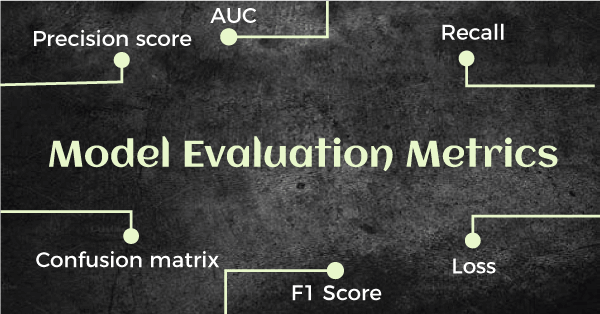